### 5 
### A. a)


In [1]:
import numpy as np

In [74]:
a = [1, 2, 3]
b = [2, 3, 4]
diff = np.array(a) - np.array(b)
diff

array([-1, -1, -1])

In [ ]:
def cubic_spline_1(t, y):
  m = len(t) - 1 # t and y are m+1 arrays
  # get the coefficients of the system
  h, b = [], []
  for i in range(0, m): # m array [0 - m-1]
    h.append(t[i+1] - t[i])
    b.append(6*(y[i+1] - y[i])/h[i])
  # reduce tri-diagonal system to bi-diagonal 
  u = [1, 2*(h[1] + h[0])] 
  v = [1, b[1] - b[0]] # m array [0 - m-2]
  for i in range(2, m+1):
    u.append(2*(h[i-1] + h[i-1-1])- (h[i-1-1])**2/u[i-1])
    v.append(b[i-1] - b[i-1-1] - (h[i-1-1]*v[i-1])/u[i-1])
    # solve by back-sub
  z = np.zeros(m+1) # z[0] = z[m] = 0 
  for i in range(1, m): # not including 0 and m
    z[m-i] = (v[m-i] - h[m-i]*z[m-i+1])/u[m-i] # u[]
  # compute the S_i(x) functions
  return z, h

In [9]:
def cubic_spline(t, y):
  m = len(t) - 1 # t and y are m+1 arrays
  # get the coefficients of the system
  h, b = [], []
  for i in range(0, m): # m array [0 - m-1]
    h.append(t[i+1] - t[i])
    b.append(6*(y[i+1] - y[i])/h[i])
  # reduce tri-diagonal system to bi-diagonal 
  u = [2*(h[1] + h[0])] 
  v = [b[1] - b[0]] # m-1 array [0 - m-2]
  for i in range(1, m):
    u.append(2*(h[i] + h[i-1])- (h[i-1])**2/u[i-1])
    v.append(b[i] - b[i-1] - (h[i-1]*v[i-1])/u[i-1])
    # solve by back-sub
  z = np.zeros(m+1) # z[0] = z[m] = 0 
  for i in range(1, m): # not including 0 and m
    z[m-i] = (v[m-i-1] - h[m-i]*z[m-i+1])/u[m-i-1] 
  # compute the S_i(x) functions
  return z, h

In [87]:
t = np.linspace(0, 2.25, num=10, dtype=float)
print("ti: ", t)
y = np.sqrt(t)
print("yi: ", y)

ti:  [0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.   2.25]
yi:  [0.         0.5        0.70710678 0.8660254  1.         1.11803399
 1.22474487 1.32287566 1.41421356 1.5       ]


In [88]:
z, h = cubic_spline(t, y)
z

array([ 0.        , -5.59379318, -5.74257631,  0.44634939, -0.66888448,
       -0.16543801, -0.1996618 , -0.12293296, -0.13229582,  0.        ])

In [15]:
def S_i(x, i, t, z, h, y):
  C = y[i+1]/h[i] - z[i+1]*h[i]/6
  D = y[i]/h[i] - z[i]*h[i]/6
  coef_1 = -z[i]/(6*h[i])
  coef_2 = z[i+1]/(6*h[i])
  return coef_1*(x-t[i+1])**3 + coef_2*(x-t[i])**3 + C*(x-t[i]) + D*(t[i+1]-x)

In [89]:
x = np.linspace(0, 2.25, num=50, dtype=float)

In [14]:
def check_x_range(x, t, m):
  for i in range(0, m):
    if x >= t[i] and x <= t[i+1]:
      return i
  return -1

In [90]:
result = []
for i in range(0, 50):
  range_index = check_x_range(x[i], t, len(t))
  if range_index != -1: 
    result.append(S_i(x[i], range_index, t, z, h, y))
  else: 
    result.append(-1)

In [91]:
err = abs(result - np.sqrt(x))
sum(err)

0.5426806970420742

In [95]:
f = CubicSpline(t, y, bc_type='natural')
x_new = f(x)
sum(abs(x_new - np.sqrt(x)))

0.39724315551017647

In [96]:
np.array(result) - np.array(x_new)

array([ 0.00000000e+00, -3.04599759e-03, -5.45391120e-03, -6.58565686e-03,
       -5.80315058e-03, -2.46830839e-03,  3.94754285e-03,  1.20089330e-02,
        1.85814606e-02,  2.04747056e-02,  1.44982483e-02,  2.45707068e-03,
        1.75355430e-02,  2.20800268e-02,  1.91163783e-02,  1.16704538e-02,
        2.76810945e-03, -1.90155599e-03, -3.04589175e-03, -2.74458087e-03,
       -1.67706853e-03, -5.22799868e-04,  4.07914015e-04,  1.62351813e-03,
        1.98854076e-03,  1.72435301e-03,  1.05232599e-03,  1.93830837e-04,
        9.15199546e-06,  6.31283500e-05,  1.24795981e-04,  1.51176920e-04,
        9.92932007e-05,  9.44962763e-05,  2.85548482e-04,  3.53681294e-04,
        3.19126120e-04,  2.02114370e-04,  2.28774509e-05,  9.07873324e-05,
        1.53275162e-04,  1.71459145e-04,  1.42926211e-04,  6.52632881e-05,
        3.75741752e-05,  8.83392844e-05,  1.00251097e-04,  8.30229383e-05,
        4.63681312e-05,  0.00000000e+00])

### 5
### A b)

In [76]:
t = np.linspace(1, 9, num=9, dtype=float)
print("t:", t)
y = [1.5, 1, 3.5, 4.5, 1, 4, 4.5, 1, 1.5] # given -> M
x = [1.2, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 4.9] # given
# x = [10, 7, 5, 3, 1, 3, 5, 7, 10] # -> V

t: [1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [77]:
n = 7+1
t_i = t[:n]
x_i = x[:n]
y_i = y[:n]

In [78]:
z_x, h_x = cubic_spline(t_i, x_i)
z_y, h_y = cubic_spline(t_i, y_i)

In [61]:
# 50 equally space points in [t_0, t_n]
num_points = 50
t_new = np.linspace(t_i[0], t_i[len(t_i)-1], num=num_points, dtype=float)

In [63]:
result_x = []
for i in range(0, num_points):
  range_index = check_x_range(t_new[i], t_i, num_points)
  if range_index != -1: 
    result_x.append(S_i(t_new[i], range_index, t_i, z_x, h_x, x_i))
  else: 
    result_x.append(-1)

result_y = []
for i in range(0, num_points):
  range_index = check_x_range(t_new[i], t_i, num_points)
  if range_index != -1: 
    result_y.append(S_i(t_new[i], range_index, t_i, z_y, h_y, y_i))
  else: 
    result_y.append(-1)

In [25]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

<ipython-input-25-3bb073bfdedc>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


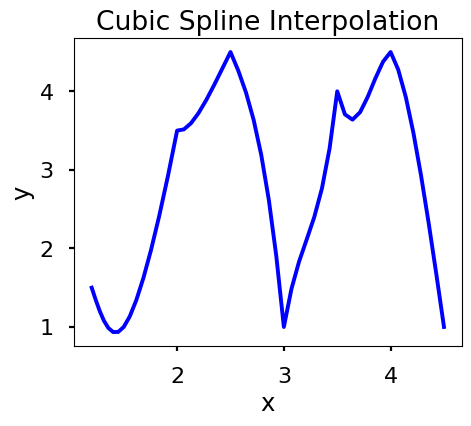

In [64]:
plt.figure(figsize = (5,4))
plt.plot(result_x, result_y, 'b')
# plt.plot(t_i, x_i, 'ro')
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

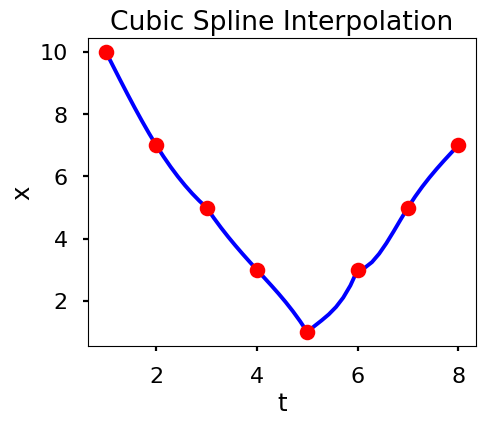

In [55]:
plt.figure(figsize = (5,4))
plt.plot(t_new, result_x, 'b')
plt.plot(t_i, x_i, 'ro')
plt.title('Cubic Spline Interpolation')
plt.xlabel('t')
plt.ylabel('x')
plt.show()

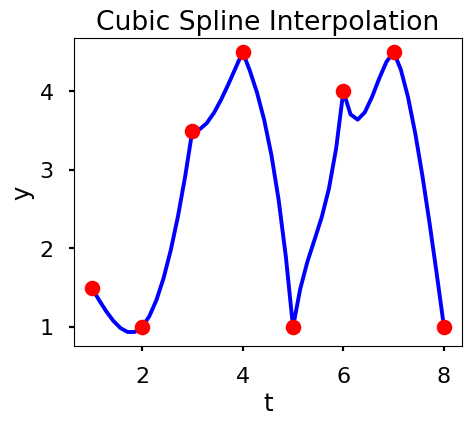

In [56]:
plt.figure(figsize = (5,4))
plt.plot(t_new, result_y, 'b')
plt.plot(t_i, y_i, 'ro')
plt.title('Cubic Spline Interpolation')
plt.xlabel('t')
plt.ylabel('y')
plt.show()

temp

In [2]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

<ipython-input-2-bcd93b4b53a4>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


In [66]:
# 50 equally space points in [t_0, t_n]
num_points = 50
t_new = np.linspace(t_i[0], t_i[len(t_i)-1], num=num_points, dtype=float)

In [67]:
f_x = CubicSpline(t_i, x_i, bc_type='natural')
f_y = CubicSpline(t_i, y_i, bc_type='natural')
x_new = f_x(t_new)
y_new = f_y(t_new)

In [ ]:
x = [0, 1, 2]
y = [1, 3, 2]

# use bc_type = 'natural' adds the constraints as we described above
f = CubicSpline(x, y, bc_type='natural')
x_new = np.linspace(0, 2, 100)
y_new = f(x_new)

In [ ]:
x = np.linspace(0, 2.25, num=10, dtype=float)
y = np.sqrt(x)
# use bc_type = 'natural' adds the constraints as we described above
f = CubicSpline(x, y, bc_type='natural')
x_new = np.linspace(0, 2.25, num=50, dtype=float)
y_new = f(x_new)

In [ ]:
z, h = cubic_spline(x, y)
print(z)
print(h)
result = []
for i in range(0, len(x_new)):
  range_index = check_x_range(x_new[i], x, len(x))
  if range_index != -1:
    result.append(S_i(x_new[i], range_index, x, z, h))
  else: 
    result.append(-1)

[ 0.         -5.59379318 -5.74257631  0.44634939 -0.66888448 -0.16543801
 -0.1996618  -0.12293296 -0.13229582  0.        ]
[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]


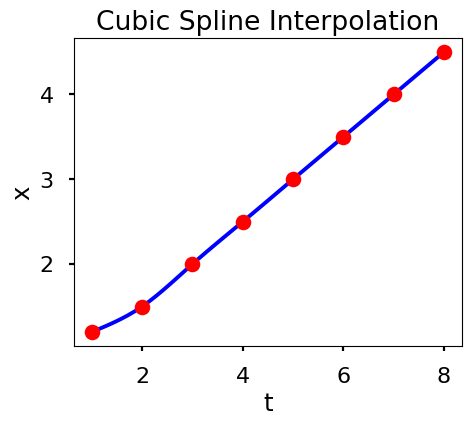

In [71]:
plt.figure(figsize = (5,4))
plt.plot(t_new, x_new, 'b')
plt.plot(t_i, x_i, 'ro')
plt.title('Cubic Spline Interpolation')
plt.xlabel('t')
plt.ylabel('x')
plt.show()

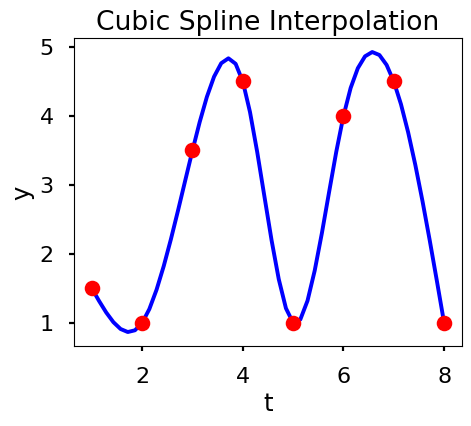

In [35]:
plt.figure(figsize = (5,4))
plt.plot(t_new, y_new, 'b')
plt.plot(t_i, y_i, 'ro')
plt.title('Cubic Spline Interpolation')
plt.xlabel('t')
plt.ylabel('y')
plt.show()

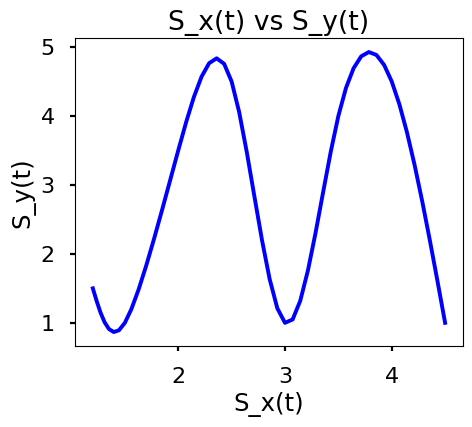

In [70]:
plt.figure(figsize = (5,4))
plt.plot(x_new, y_new, 'b')
plt.title('S_x(t) vs S_y(t)')
plt.xlabel('S_x(t)')
plt.ylabel('S_y(t)')
plt.show()